# Admitted or not?

The dataset contains four variables: admit, gre, gpa, and prestige:<br>
- admit-> is a binary variable. It indicates whether or not a candidate was admitted into UCLA (admit = 1) our not (admit = 0).
- gre -> is the GRE score. GRE stands for Graduate Record Examination.
- gpa -> stands for Grade Point Average.
- prestige -> is the prestige of an applicant alta mater, with 1 being the highest (high prestige) and 4 as the lowest (not prestigious).

Dataset: admissions.csv

## Goal: 
The target variable admit indicates whether or not a candidate will be admitted into UCLA (admit = 1) our not (admit = 0). Minimizes False Positives means that the model will minimize incorrect flags as admit. Minimizes False Negatives means that the model will minimize incorrect flags as not admit.
In this case, I will try to **minimize the false positives** because the cost of admit the wrong candidate could be higher than not admit the correct candidate.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import binarize

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')
%pylab inline
plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [8]:
#data
dt = pd.read_csv("dataset-ucla-admissions.csv")
dt.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [9]:
dt.admit.value_counts(normalize=True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

In [10]:
dt.dropna(how="any", inplace=True)
dt.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [11]:
X = dt.drop("admit", axis = 1)
y = dt.admit

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=0)

In [13]:
#Features Importance : Adaboost
n_estimators_range = range(50, 300, 50)
param_grid_dt = {}
param_grid_dt["n_estimators"] = n_estimators_range
grid_dt = GridSearchCV(estimator = AdaBoostClassifier(), 
            param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
grid_dt.fit(X, y)
ada = AdaBoostClassifier(n_estimators=grid_dt.best_params_['n_estimators'])
ada.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [14]:
importances = sorted(zip(ada.feature_importances_, X), key = lambda x: x[0], reverse = True)

In [15]:
importances

[(0.57999999999999996, 'gpa'),
 (0.38, 'gre'),
 (0.040000000000000001, 'prestige')]

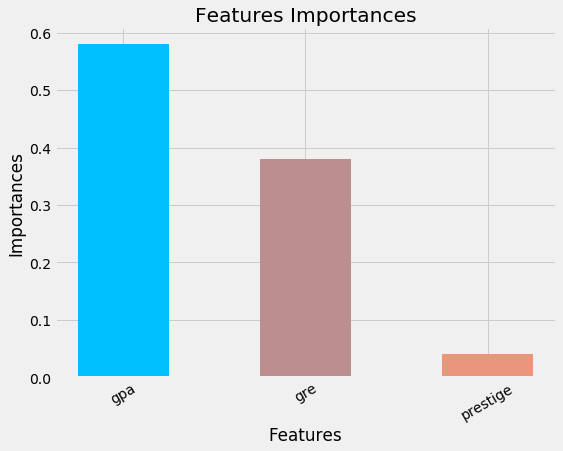

In [18]:
label = []
val = []
for i, elem in importances:
    label.append(elem)
    val.append(i)
        
label_ = label
pos = range(1,len(importances)+1)
colors = ['deepskyblue', 'rosybrown', 'darksalmon']
          
w = 0.5

#Matplotlib
plt.figure(figsize = (8,6))
plt.bar(pos, width=w, height=val, color = colors, tick_label = label_,  align="center")
plt.ylabel("Importances")
plt.xticks(rotation=30)
plt.xlabel("Features")
plt.title("Features Importances")
plt.show()

## More Action Selecting Features

In [11]:
lista = [elem[1] for elem in importances]

In [12]:
# 1 Feature
lista_1f = lista[0:1]
X = dt[lista_1f]

In [13]:
n_estimators_range = range(50, 300, 50)
param_grid_dt = {}
param_grid_dt["n_estimators"] = n_estimators_range
grid_dt = GridSearchCV(estimator = AdaBoostClassifier(), 
            param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
grid_dt.fit(X, y)
ada = AdaBoostClassifier(n_estimators=grid_dt.best_params_['n_estimators'])
ada.fit(X,y)
cv_ada = cross_val_score(ada, X, y, cv=5, scoring="accuracy").mean()
print round(cv_ada,4)

0.6626


In [14]:
# 2 Features
lista_2f = lista[0:2]
X = dt[lista_2f]

In [15]:
n_estimators_range = range(50, 300, 50)
param_grid_dt = {}
param_grid_dt["n_estimators"] = n_estimators_range
grid_dt = GridSearchCV(estimator = AdaBoostClassifier(), 
            param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
grid_dt.fit(X, y)
ada = AdaBoostClassifier(n_estimators=grid_dt.best_params_['n_estimators'])
ada.fit(X,y)
cv_ada = cross_val_score(ada, X, y, cv=5, scoring="accuracy").mean()
print round(cv_ada,4)

0.675


In [16]:
# 3 Features
lista_3f = lista[0:3]
X = dt[lista_3f]

In [17]:
n_estimators_range = range(50, 300, 50)
param_grid_dt = {}
param_grid_dt["n_estimators"] = n_estimators_range
grid_dt = GridSearchCV(estimator = AdaBoostClassifier(), 
            param_grid = param_grid_dt, cv = 5, scoring = "accuracy")
grid_dt.fit(X, y)
ada = AdaBoostClassifier(n_estimators=grid_dt.best_params_['n_estimators'])
ada.fit(X,y)
cv_ada = cross_val_score(ada, X, y, cv=5, scoring="accuracy").mean()
print round(cv_ada,4)

0.6976


Since the accuracy increased including each variable in sorted by importance, I will keep them.

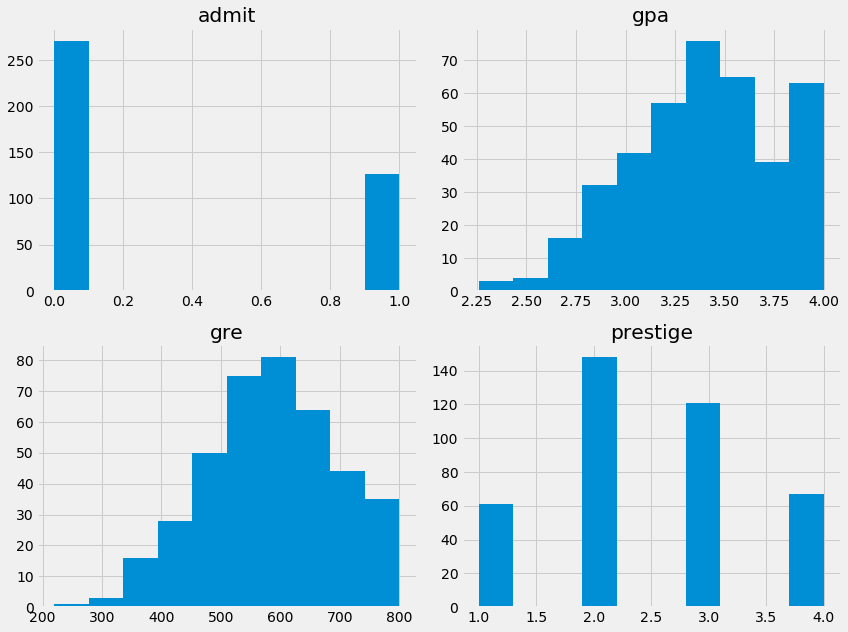

In [18]:
dt.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

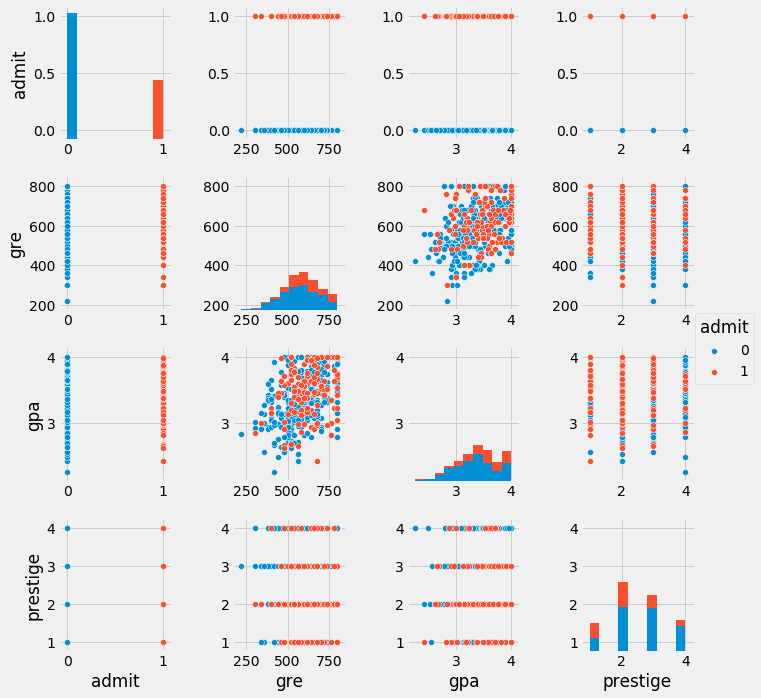

In [19]:
sns.pairplot(dt, hue="admit");

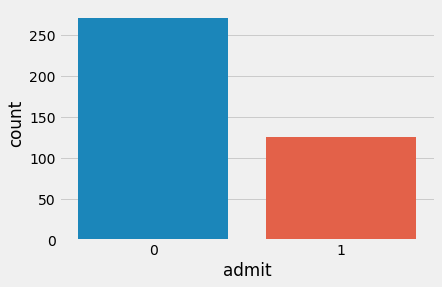

In [20]:
sns.countplot(x="admit", data=dt)

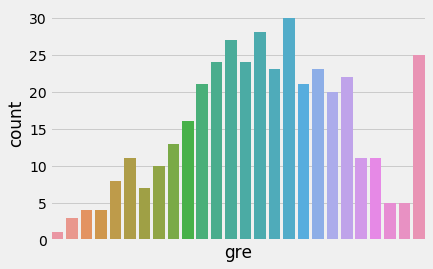

In [21]:
sns.countplot(x ="gre", data= dt,)
plt.tick_params(axis='x',labelbottom='off') # labels along the bottom edge are off   
plt.show()

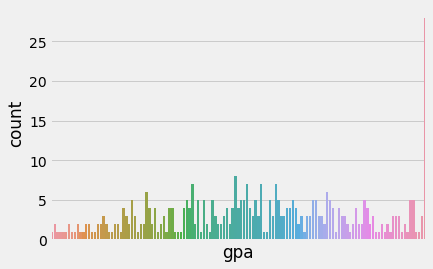

In [22]:
sns.countplot(x ="gpa", data= dt,)
plt.tick_params(axis='x',labelbottom='off') # labels along the bottom edge are off   
plt.show()

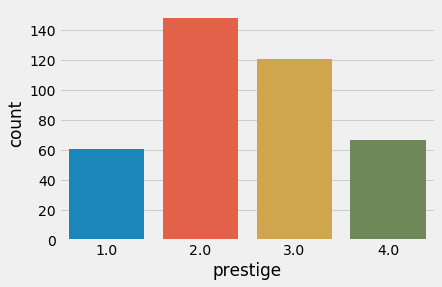

In [23]:
sns.countplot(x ="prestige", data= dt,) 
plt.show()

In [24]:
#Verifying unique values
keys = dt.columns
commands = ['dt.' + keys[i] + ".unique()" for i in range(len(keys))]
i = 0
for item in commands:
    print "* " + keys[i] + ':'
    print sorted(eval(item))
    i+=1

* admit:
[0, 1]
* gre:
[220.0, 300.0, 340.0, 360.0, 380.0, 400.0, 420.0, 440.0, 460.0, 480.0, 500.0, 520.0, 540.0, 560.0, 580.0, 600.0, 620.0, 640.0, 660.0, 680.0, 700.0, 720.0, 740.0, 760.0, 780.0, 800.0]
* gpa:
[2.2599999999999998, 2.4199999999999999, 2.48, 2.52, 2.5499999999999998, 2.5600000000000001, 2.6200000000000001, 2.6299999999999999, 2.6499999999999999, 2.6699999999999999, 2.6800000000000002, 2.6899999999999999, 2.7000000000000002, 2.71, 2.73, 2.7599999999999998, 2.7799999999999998, 2.79, 2.8100000000000001, 2.8199999999999998, 2.8300000000000001, 2.8399999999999999, 2.8500000000000001, 2.8599999999999999, 2.8799999999999999, 2.8999999999999999, 2.9100000000000001, 2.9199999999999999, 2.9300000000000002, 2.9399999999999999, 2.9500000000000002, 2.96, 2.9700000000000002, 2.98, 3.0, 3.0099999999999998, 3.02, 3.0299999999999998, 3.04, 3.0499999999999998, 3.0600000000000001, 3.0699999999999998, 3.0800000000000001, 3.0899999999999999, 3.1000000000000001, 3.1099999999999999, 3.12000

## Prediction¶

Question: Can I predict whether or not a candidate will be admitted into UCLA? (admit = 1) our not (admit = 0)

In [25]:
# Null Accuracy
y.value_counts(normalize=True)

0    0.68262
1    0.31738
Name: admit, dtype: float64

In [26]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)                
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))
print classification_report(y_test, y_pred)
print confusion_matrix(y_test, y_pred)



Accuracy: 77.0000%
             precision    recall  f1-score   support

          0       0.76      0.97      0.85        69
          1       0.83      0.32      0.47        31

avg / total       0.78      0.77      0.73       100

[[67  2]
 [21 10]]


In [27]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
tot_a_1 = TN + FP
tot_a_2 = FN + TP
tot_p_1 = TN + FN
tot_p_2 = FP + TP
tot_g = tot_a_1+tot_a_2
mx =np.array(["TN",TN,"FP",FP,tot_a_1,"FN",FN,"TP", TP, tot_a_2,"", tot_p_1,"", tot_p_2, tot_g]).reshape(3,5)
cols = [" ","pred0", " ", "pred1",  "total"]
index = ["corr0", "corr1", "total"]
cm_df = pd.DataFrame(mx, columns=cols, index=index )
print cm_df
print "\t"
tpr = round(TP / float(TP + FN),4)
tnr = round(TN / float(TN + FP),4)
fpr = round(FP / float(TN + FP),4)
fnr = round(FN / float(FN + TP),4)
print "Sensitivity or Recall or TPR:", tpr*100, "%"
print "Specificity or TNR:", tnr*100,"%"
print "FPR:", fpr*100,"%"
print "FNR:", fnr*100,"%"

          pred0     pred1 total
corr0  TN    67  FP     2    69
corr1  FN    21  TP    10    31
total        88        12   100
	
Sensitivity or Recall or TPR: 32.26 %
Specificity or TNR: 97.1 %
FPR: 2.9 %
FNR: 67.74 %


### ROC_AUC curve
ROC (receiver operating characteristic) curve is a commonly used way to visualize the performance of a binary classifier.
AUC (area under curve) is arguably the best way to summarize a model performance's in a single number.

In [28]:
#Derive probabilities of class 1 from the test set
test_probs = lr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Outputs the fpr, tpr, for varying thresholds

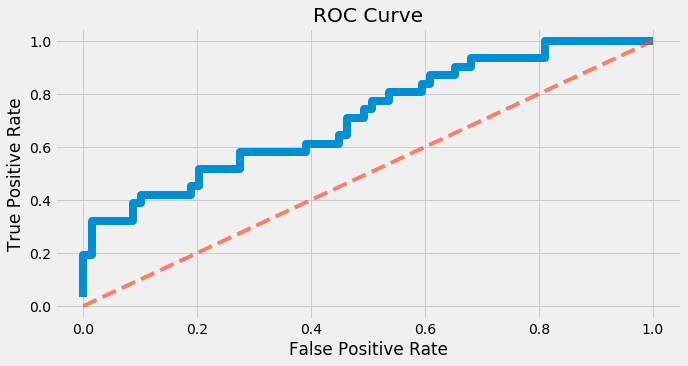

In [29]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, linewidth=8)
#Line of randomness
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [30]:
#Calculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)

0.71154745208041137

In [31]:
#Cross validated roc_auc score
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="roc_auc").mean()

0.67934006734006724

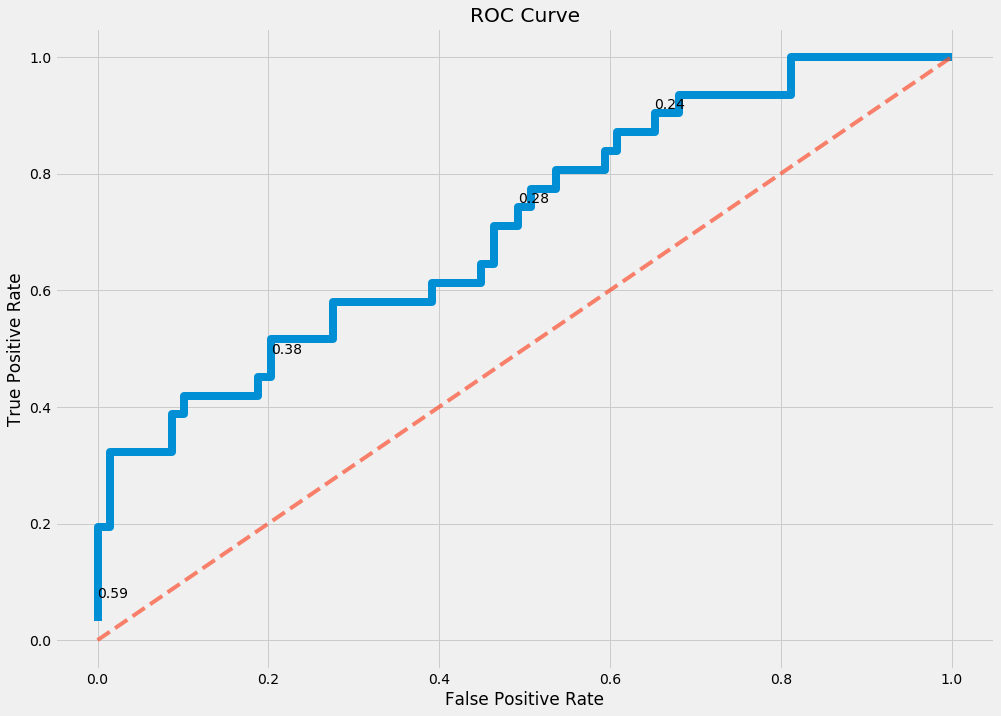

In [32]:
#Plot ROC_curve again but this time annotate the curve with the threshold value
# Obs = [::10] = retorne o alista de 10 em 10
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::10], fpr[::10], tpr[::10]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y + 0.04))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

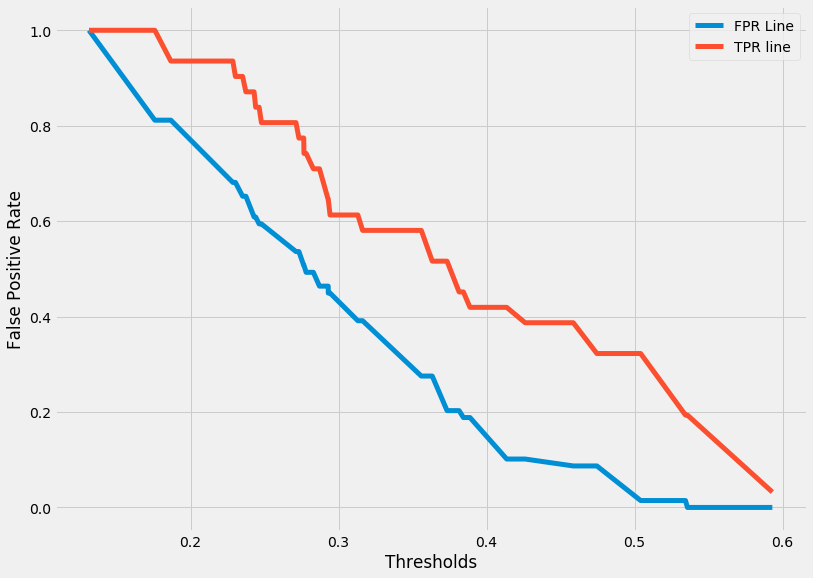

In [33]:
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line")
plt.plot(thres, tpr, linewidth=5, label = "TPR line")
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show();

In [34]:
def thres_acc(t, yt, tp):
    labels = np.where(tp>=t, 1, 0)
    return accuracy_score(yt, labels)
thresholds = np.linspace(0,1, 130)
acc_scores = [thres_acc(i, y_test, test_probs) for i in thresholds]
#Which threshold produces the best accuracy score?
thres_score_dict = dict(zip(thresholds,acc_scores))
sorted(thres_score_dict.items(), key = lambda x:x[1], reverse=True)[0]

(0.50387596899224807, 0.78000000000000003)

In [40]:
labels_50= np.where(test_probs>=0.50387596899224807, 1, 0)
labels_50[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [41]:
accuracy_score(y_test, labels_50)

0.78000000000000003

In [42]:
accuracy_score(y_test, y_pred)

0.77000000000000002

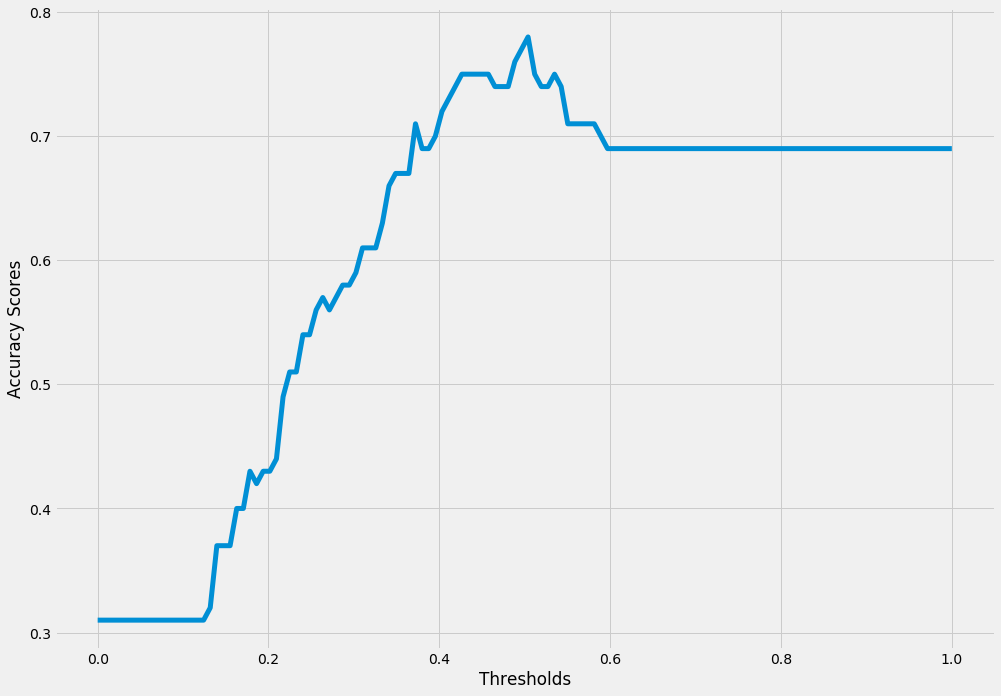

In [43]:
#Plot thresholds vs accuracy scores
plt.figure(figsize=(15,11))
plt.plot(thresholds, acc_scores, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy Scores")
plt.show()

In [44]:
cm = confusion_matrix(y_test, labels_50)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
tot_a_1 = TN + FP
tot_a_2 = FN + TP
tot_p_1 = TN + FN
tot_p_2 = FP + TP
tot_g = tot_a_1+tot_a_2
mx =np.array(["TN",TN,"FP",FP,tot_a_1,"FN",FN,"TP", TP, tot_a_2,"", tot_p_1,"", tot_p_2, tot_g]).reshape(3,5)
cols = [" ","pred0", " ", "pred1",  "total"]
index = ["corr0", "corr1", "total"]
cm_df = pd.DataFrame(mx, columns=cols, index=index )
print cm_df
print "\t"
tpr = round(TP / float(TP + FN),4)
tnr = round(TN / float(TN + FP),4)
fpr = round(FP / float(TN + FP),4)
fnr = round(FN / float(FN + TP),4)
print "Sensitivity or Recall or TPR:", tpr*100, "%"
print "Specificity or TNR:", tnr*100,"%"
print "FPR:", fpr*100,"%"
print "FNR:", fnr*100,"%"

          pred0     pred1 total
corr0  TN    68  FP     1    69
corr1  FN    21  TP    10    31
total        89        11   100
	
Sensitivity or Recall or TPR: 32.26 %
Specificity or TNR: 98.55 %
FPR: 1.45 %
FNR: 67.74 %


### Conclusion: Adjustment threshold helped to minimize False Positive Rate (my goal) and increase  the Accuracy score!